<center>
    <img src="https://upload.wikimedia.org/wikipedia/commons/c/cb/UTM-LOGO-FULL.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

# Massive Data Mining and Streaming

## Assignment 3 - Group 1

#### Group Members:
<ul>
    <li>Cassandra Tan Hui Ming </li>
    <li>Noor Suhaida binti Suhaimi</li>
    <li>Priambudi Huda Firmani</li>
    <li>Yang Dongdao</li>
</ul>


### Initialization

#### Import libraries

In [2]:
# libraries for dataframe and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
# libraries for clustering
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

#### Load the dataset and save to dataframe

In [4]:
df = pd.read_excel('online_retail_II.xlsx')
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


### Exploring the Data

#### Total rows and columns

In [5]:
df.shape

(525461, 8)

#### Data info

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


#### Data type

In [7]:
print(df.dtypes)

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object


There are three types of data, which are object, float and datetime.

#### Data description

In [8]:
df.describe()

,Quantity,Price,Customer ID
count,525461.000000,525461.000000,417534.000000
mean,10.337667,4.688834,15360.645478
std,107.424110,146.126914,1680.811316
min,-9600.000000,-53594.360000,12346.000000
25%,1.000000,1.250000,13983.000000
50%,3.000000,2.100000,15311.000000
75%,10.000000,4.210000,16799.000000
max,19152.000000,25111.090000,18287.000000


In [9]:
df.describe(include = 'object')

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


### Data Cleansing

#### Dealing with the NULL values

In [10]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

The data contains some missing values in the columns of description and customer ID. The null values will be omitted from the data in this study

In [11]:
df.dropna(inplace=True)
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

As it shown, the data is now cleaned and has no missing values. Thus, it can be proceeded in the next stage

### Data Preparation

#### Generating new column: Amount

In [12]:
df['Amount'] = df['Quantity']*df['Price']
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Amount
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,5.90
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,7.50


#### Creating new dataframe

cust_details dataframe will have each distinct customer with total amount of money they have spent.

In [13]:
cust_details = df.groupby('Customer ID')['Amount'].sum()
cust_details = cust_details.reset_index()
cust_details

,Customer ID,Amount
0,12346.0,-64.68
1,12347.0,1323.32
2,12348.0,222.16
3,12349.0,2646.99
4,12351.0,300.93
...,...,...
4378,18283.0,641.77
4379,18284.0,436.68
4380,18285.0,427.00
4381,18286.0,1188.43


cust_details2 dataframe will have each distinct customer with total transaction they have done.

In [14]:
cust_details2 = df.groupby('Customer ID')['Invoice'].count()
cust_details2 = cust_details2.reset_index()
cust_details2.columns = ['Customer ID', 'Frequency']
cust_details2

,Customer ID,Frequency
0,12346.0,46
1,12347.0,71
2,12348.0,20
3,12349.0,107
4,12351.0,21
...,...,...
4378,18283.0,230
4379,18284.0,29
4380,18285.0,12
4381,18286.0,70


cust_details3 dataframe will have each distinct customer with the last time the transaction they made

In [15]:
max_date=max(df['InvoiceDate'])
max_date

Timestamp('2010-12-09 20:01:00')

In [16]:
df['Last Transaction']=max_date-df['InvoiceDate']
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Amount,Last Transaction
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40,373 days 12:16:00
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,373 days 12:16:00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,373 days 12:16:00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80,373 days 12:16:00
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,373 days 12:16:00
...,...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,5.90,0 days 00:00:00
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75,0 days 00:00:00
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75,0 days 00:00:00
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,7.50,0 days 00:00:00


In [17]:
# Compute last transaction date to get the recency of customers

cust_details3 = df.groupby('Customer ID')['Last Transaction'].min()
cust_details3 = cust_details3.reset_index()
cust_details3.head()

,Customer ID,Last Transaction
0,12346.0,66 days 03:28:00
1,12347.0,2 days 05:04:00
2,12348.0,73 days 05:02:00
3,12349.0,42 days 11:38:00
4,12351.0,10 days 04:38:00


In [18]:
cust_details3['Last Transaction'] = cust_details3['Last Transaction'].dt.days
cust_details3.head()

,Customer ID,Last Transaction
0,12346.0,66
1,12347.0,2
2,12348.0,73
3,12349.0,42
4,12351.0,10


#### Merging all the cust_detail dataframes

In [25]:
cust_details = pd.merge(cust_details, cust_details2, on='Customer ID', how='inner')
cust_details = pd.merge(cust_details, cust_details3, on='Customer ID', how='inner')

In [26]:
cust_details.head()

,Customer ID,Amount,Frequency_x,Last Transaction_x,Frequency_y,Last Transaction_y
0,12346.0,-64.68,46,66,46,66
1,12347.0,1323.32,71,2,71,2
2,12348.0,222.16,20,73,20,73
3,12349.0,2646.99,107,42,107,42
4,12351.0,300.93,21,10,21,10


Removal of Duplicated Columns (Frequency and Transaction)

In [27]:
cust_details=cust_details.drop(['Frequency_x','Last Transaction_x'],axis=1)

In [28]:
cust_details=cust_details.rename({'Frequency_y':'Frequency','Last Transaction_y':'Last Transaction'},axis=1)

In [29]:
cust_details.head()

,Customer ID,Amount,Frequency,Last Transaction
0,12346.0,-64.68,46,66
1,12347.0,1323.32,71,2
2,12348.0,222.16,20,73
3,12349.0,2646.99,107,42
4,12351.0,300.93,21,10


#### Treating outliers

Displaying the outliers over all the variable

Text(0.5, 0, 'Attributes')

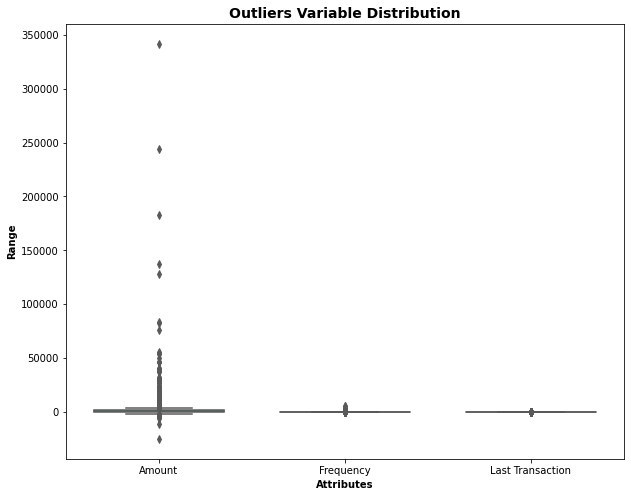

In [30]:
attributes = ['Amount','Frequency','Last Transaction']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = cust_details[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [31]:
# Removing outliers for Amount
Q1 = cust_details['Amount'].quantile(0.05)
Q3 = cust_details['Amount'].quantile(0.95)
IQR = Q3 - Q1
cust_details = cust_details[(cust_details['Amount'] >= Q1 - 1.5*IQR) & (cust_details['Amount'] <= Q3 + 1.5*IQR)]

# Removing outliers for Recency
Q1 = cust_details['Last Transaction'].quantile(0.05)
Q3 = cust_details['Last Transaction'].quantile(0.95)
IQR = Q3 - Q1
cust_details = cust_details[(cust_details['Last Transaction'] >= Q1 - 1.5*IQR) & (cust_details['Last Transaction'] <= Q3 + 1.5*IQR)]

# Removing outliers for Frequency
Q1 = cust_details['Frequency'].quantile(0.05)
Q3 = cust_details['Frequency'].quantile(0.95)
IQR = Q3 - Q1
cust_details = cust_details[(cust_details['Frequency'] >= Q1 - 1.5*IQR) & (cust_details['Frequency'] <= Q3 + 1.5*IQR)]

In [32]:
cust_details

,Customer ID,Amount,Frequency,Last Transaction
0,12346.0,-64.68,46,66
1,12347.0,1323.32,71,2
2,12348.0,222.16,20,73
3,12349.0,2646.99,107,42
4,12351.0,300.93,21,10
...,...,...,...,...
4378,18283.0,641.77,230,17
4379,18284.0,436.68,29,64
4380,18285.0,427.00,12,295
4381,18286.0,1188.43,70,111


#### Scaling the attributes

In [33]:
scaler = StandardScaler()

In [34]:
scaled = scaler.fit_transform(cust_details[['Amount', 'Frequency', 'Last Transaction']])

In [35]:
scaled = pd.DataFrame(scaled)

In [36]:
scaled.columns = ['Amount', 'Frequency', 'Last Transaction']

In [37]:
scaled

,Amount,Frequency,Last Transaction
0,-0.747859,-0.331098,-0.261343
1,0.026146,-0.087123,-0.911671
2,-0.587905,-0.584831,-0.190214
3,0.764279,0.264201,-0.505216
4,-0.543980,-0.575072,-0.830380
...,...,...,...
4295,-0.353914,1.464556,-0.759250
4296,-0.468280,-0.497000,-0.281666
4297,-0.473678,-0.662903,2.065610
4298,-0.049074,-0.096882,0.195918


### Model Development: K-means Clustering

#### Elbow Method

<ul>
    <li>Elbow graph helps in selecting the optimal number of clusters by fitting the model with a range of values for K </li> <p>
    <li>If the line chart resembles an arm, then the “elbow” (the point of inflection on the curve) is a good indication that the underlying model fits best at that point.  </li>
</ul>

In [41]:
score=[]
for i in range (2,7):
    kmeans=KMeans (n_clusters=i, max_iter=50, verbose=True).  fit(scaled)
    score.append(kmeans.inertia_)

Initialization complete
Iteration 0, inertia 11696.357870226135
Iteration 1, inertia 7889.6782404618225
Iteration 2, inertia 7833.061102444593
Iteration 3, inertia 7823.143780841304
Iteration 4, inertia 7815.9933883633
Iteration 5, inertia 7812.253450750091
Iteration 6, inertia 7811.053811353544
Iteration 7, inertia 7810.563441187855
Converged at iteration 7: center shift 9.177505986676501e-05 within tolerance 0.00010000000000000011.
Initialization complete
Iteration 0, inertia 12216.980449677098
Iteration 1, inertia 8805.378907852888
Iteration 2, inertia 8742.462992491852
Iteration 3, inertia 8731.080793561436
Iteration 4, inertia 8728.835197504208
Iteration 5, inertia 8728.090987434487
Iteration 6, inertia 8727.515029062206
Iteration 7, inertia 8727.171398581115
Converged at iteration 7: center shift 2.0884097293809936e-05 within tolerance 0.00010000000000000011.
Initialization complete
Iteration 0, inertia 13712.658331473693
Iteration 1, inertia 7848.661193456301
Iteration 2, inerti

In [42]:
len(score)

5

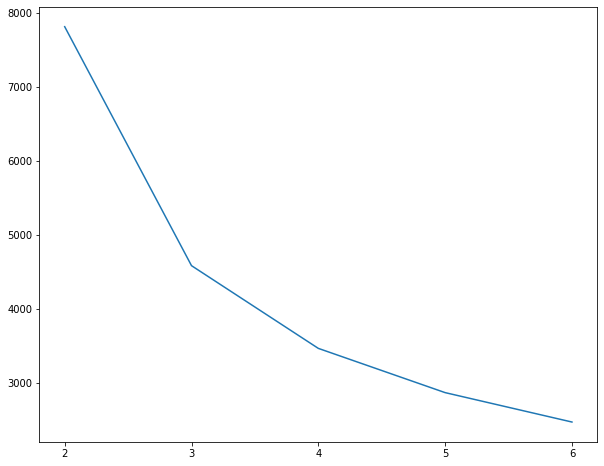

In [43]:
plt.plot(range(2,7,1), score)
plt.xticks(ticks=range(2,7))
plt.show()

#### Calculate Silhouette Score

<ul>
    <li>The silhouette score measures the similarity an object is to its cluster compared to other clusters.</li><p>
    <li>The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its cluster and poorly matched to neighboring clusters</li> <p>
    <li>If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters</li>
</ul>


In [44]:
for i in range (2,7):
    kmeans = KMeans (n_clusters=i, max_iter=50).fit(scaled)
    cluster_labels=kmeans.labels_
    silhouette_avg=silhouette_score(scaled, cluster_labels)
    print('For n_cluster{} the silhouette score is {}'.format(i, silhouette_avg))

For n_cluster2 the silhouette score is 0.5162414146195516
For n_cluster3 the silhouette score is 0.5033864678045522
For n_cluster4 the silhouette score is 0.48129761058136217
For n_cluster5 the silhouette score is 0.4742396877009616
For n_cluster6 the silhouette score is 0.4210396959755799


From the above elbow graphs and silhouette scores, it can be concluded that 3 is the ideal k value for number of clusters.

#### Build final model with k=3

In [45]:
kmeans = KMeans(n_clusters=3, max_iter=50). fit(scaled)
clusters = kmeans.labels_

In [46]:
cust_details['Cluster']=clusters

In [47]:
cust_details

,Customer ID,Amount,Frequency,Last Transaction,Cluster
0,12346.0,-64.68,46,66,1
1,12347.0,1323.32,71,2,1
2,12348.0,222.16,20,73,1
3,12349.0,2646.99,107,42,1
4,12351.0,300.93,21,10,1
...,...,...,...,...,...
4378,18283.0,641.77,230,17,1
4379,18284.0,436.68,29,64,1
4380,18285.0,427.00,12,295,0
4381,18286.0,1188.43,70,111,1


Identifying the number of customers in each cluster

In [48]:
cust_details.groupby('Cluster').size()

Cluster
0    1042
1    2754
2     504
dtype: int64

#### Visualizations of results based on K-means Clustering

#### Clusters and their amount of money have spent

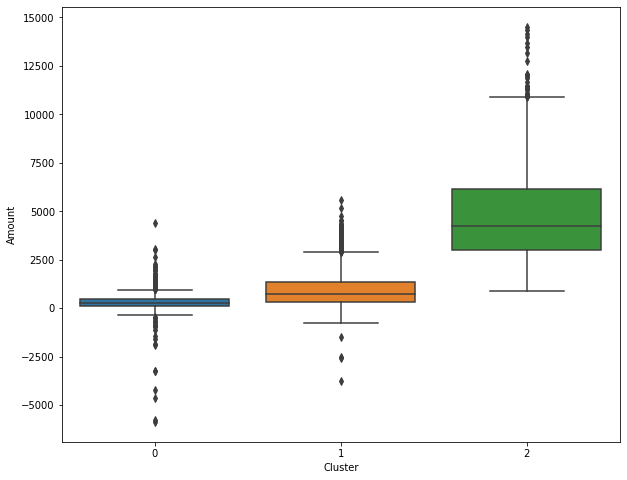

In [49]:
sns.boxplot(x='Cluster', y='Amount', data=cust_details)

#### Clusters and their transaction frequency

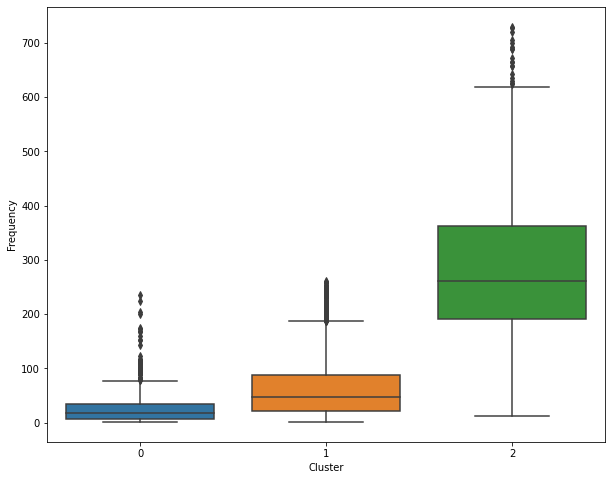

In [50]:
sns.boxplot(x='Cluster', y='Frequency', data=cust_details)

#### Clusters and their last transaction activity

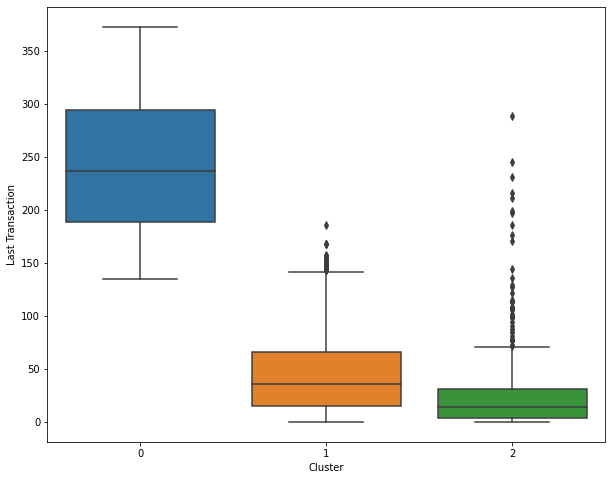

In [51]:
sns.boxplot(x='Cluster', y='Last Transaction', data=cust_details)

#### Findings based on K-means Clustering

<ul>
    <li>The customers are divided into 3 groups, with 1042 customers in Cluster ID 0, 504 customers in Cluster ID 1, and 2754 customers in Cluster ID 2 
    <li>The third cluster is the most promising market because the customers spent the most money and made the most transaction. Furthermore, the low last transaction number of this cluster indicates that the customers in this cluster possibly make another transaction sooner than the others</li> <p>
        <li>The first cluster has pretty similar behaviours to the second cluster. However, this cluster can be concluded as a better cluster since the last transaction indicates that they made more recent transaction than the cluster two</li> <p>
</ul>


###Model Development: Hierarchical Clustering

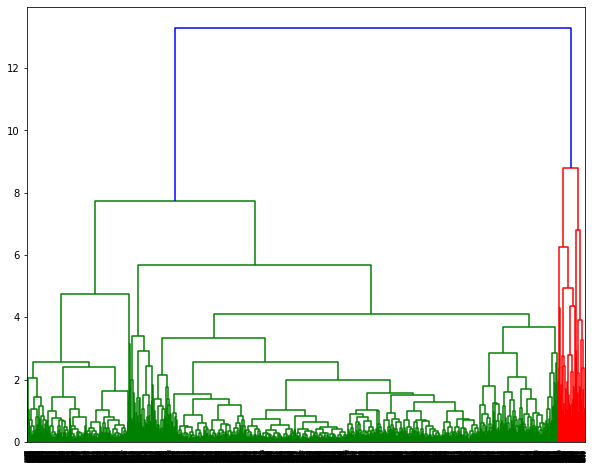

In [53]:
mergings = linkage(scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [67]:
# 2 clusters
cluster_labels = cut_tree(mergings, n_clusters=2).reshape(-1, )
cluster_labels

array([0, 0, 0, ..., 0, 0, 0])

In [56]:
cust_details_copy=cust_details

In [69]:
# Assign cluster labels

cust_details_copy['Cluster_Labels'] = cluster_labels
cust_details_copy=cust_details_copy.drop('Cluster',axis=1)
cust_details_copy.head()

,Customer ID,Amount,Frequency,Last Transaction,Cluster_Labels
0,12346.0,-64.68,46,66,0
1,12347.0,1323.32,71,2,0
2,12348.0,222.16,20,73,0
3,12349.0,2646.99,107,42,0
4,12351.0,300.93,21,10,0


In [70]:
cust_details_copy.groupby('Cluster_Labels').size()

Cluster_Labels
0    4095
1     205
dtype: int64

####Visualizations of results based on Hierarchical Clustering

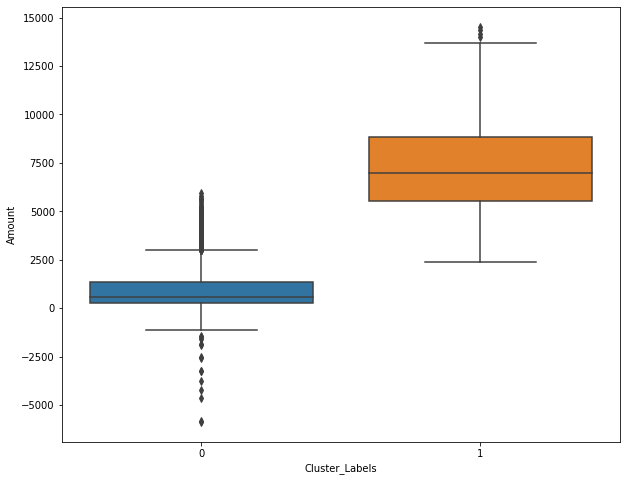

In [71]:
# Plot Cluster Id vs Amount

sns.boxplot(x='Cluster_Labels', y='Amount', data=cust_details_copy)

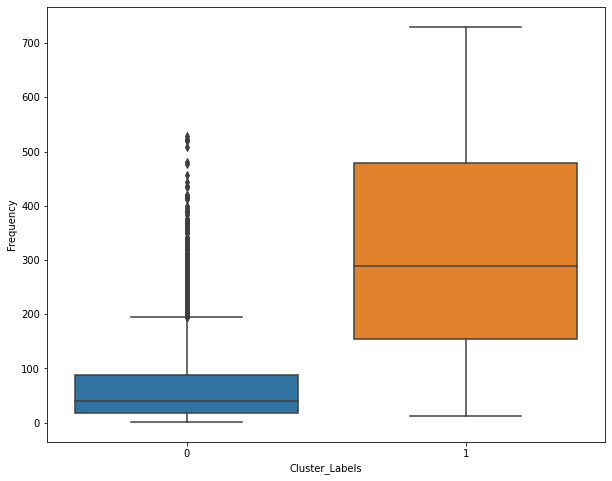

In [72]:
# Plot Cluster Id vs Frequency

sns.boxplot(x='Cluster_Labels', y='Frequency', data=cust_details_copy)

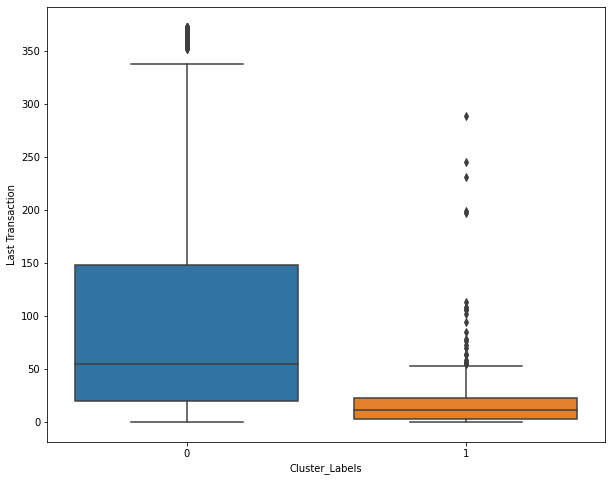

In [73]:
# Plot Cluster Id vs Recency

sns.boxplot(x='Cluster_Labels', y='Last Transaction', data=cust_details_copy)

####Findings based on Hierarchical Clustering

<ul>
    <li>The customers are divided into 2 groups, with 4095 customers in Cluster ID 0 and 205 customers in Cluster ID 1
    <li>Cluster ID 1 customers are the most promising market because the customers spent the most money and made the most transaction. Furthermore, the low last transaction number of this cluster indicates that the customers in this cluster possibly make another transaction sooner than the others</li> <p>
        <li>Cluster ID 0 customers possess a lower loyalty to the retail store as compared to Cluster ID 1 customers</li> <p>
</ul>
